In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gensim tensorflow pandas scikit-learn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

In [ ]:

import pandas as pd

# Example for a CSV file
df = pd.read_csv('/content/drive/My Drive/ttrain.csv')
df_test = pd.read_csv('/content/drive/My Drive/ttest.csv')


In [ ]:
df

,comment,nlabel,cleaned_comment
0,"ময়না পরকালে বিশ্বাসী নাহ,যাহা দেখো নাই, বিশ্বা...",2,ময়না পরকালে বিশ্বাসী দেখো বিশ্বাস করনা আব্বার ...
1,পরকাল বিশ্বাস কখনো বেপর্দার চলাফেরা না। টেলিভি...,2,পরকাল বিশ্বাস কখনো বেপর্দার চলাফেরা টেলিভিশনের...
2,হিউজ ফাক ফ্রোম উগান্ডা।,2,হিউজ ফাক ফ্রোম উগান্ডা
3,কমু,1,কমু
4,"নায়ক শব্দটার থাকলো না,, শুকুরের জঙ্গলের কচু পা...",2,নায়ক শব্দটার থাকলো শুকুরের জঙ্গলের কচু পাগল হয়েছে
...,...,...,...
47467,তোমাকে ভালবাসি তোমাকে বাঁচাব জীবন জীবন মৃত্যু,1,ভালবাসি বাঁচাব জীবন জীবন মৃত্যু
47468,লায়লা অপু ঠিকানা চাই,1,লায়লা অপু ঠিকানা চাই
47469,ধন্যবাদ বাংলাদেশ সরকার,1,ধন্যবাদ বাংলাদেশ সরকার
47470,ফি আমানিল্লাহ দাদি হলেন প্যারাডাইজ জান্নাতুল ফ...,1,আমানিল্লাহ দাদি প্যারাডাইজ জান্নাতুল ফার্ডাস প...


In [ ]:

# Drop rows where 'comment' is null
df = df[df['comment'].notnull()]

# Drop duplicate values in the 'comment' column
df = df.drop_duplicates(subset='comment')

# Reset index after dropping rows (optional)
df = df.reset_index(drop=True)


# Drop rows where 'comment' is null
df_test = df_test[df_test['comment'].notnull()]

# Drop duplicate values in the 'comment' column
df_test = df_test.drop_duplicates(subset='comment')

# Reset index after dropping rows (optional)
df_test = df_test.reset_index(drop=True)


In [ ]:
df['nlabel'] = df['nlabel'].replace({2: 0, 3: 0, 4: 0, 5: 0})
#df_test['nlabel'] = df_test['nlabel'].replace({2: 0})
# Replace specific label values with 0 in df_test['nlabel']
df_test['nlabel'] = df_test['nlabel'].replace({2: 0, 3: 0, 4: 0, 5: 0})


In [ ]:

df_test

,comment,nlabel,cleaned_comment
0,"বয়কট করলাম,",1,বয়কট করলাম
1,সালা পাগোল চোদা নায়ক,0,সালা পাগোল চোদা নায়ক
2,প্রশ্ন জন্মদাতা আছে।নাকি এমনেই দুনিয়াতে আসছে??...,0,প্রশ্ন জন্মদাতা আছে নাকি এমনেই দুনিয়াতে আসছে ত...
3,"নাটোরের বনলতাসেন,বড়াইগ্রামের অহংকার।",1,নাটোরের বনলতাসেন বড়াইগ্রামের অহংকার
4,"সাফা বলেছে, বিশ্বাস না, পরকাল বিশ্বাস না। উনার...",0,সাফা বলেছে বিশ্বাস পরকাল বিশ্বাস উনার বাবা আছে...
...,...,...,...
8680,কবরে হুতার কয়কটা রডের বাড়ি খাইলে বিশ্বাস অইবো ...,0,কবরে হুতার কয়কটা রডের বাড়ি খাইলে বিশ্বাস অইবো ...
8681,কামলা প্রসঙ্গের কথা যাচ্ছে।,0,কামলা প্রসঙ্গের কথা যাচ্ছে
8682,হাগল,0,হাগল
8683,ওরে লুতু লুতু পুতু পুতু বাবুটা আল্লাহ্‌র মাফ চ...,0,ওরে লুতু লুতু পুতু পুতু বাবুটা আল্লাহ্‌র মাফ চ...


In [ ]:
df['cleaned_comment'] = df['cleaned_comment'].fillna("").astype(str)
df_test['cleaned_comment'] = df_test['cleaned_comment'].fillna("").astype(str)

In [ ]:
df['comment'] = df['cleaned_comment']
df_test['comment'] = df_test['cleaned_comment']

In [ ]:
!pip install umap-learn numpy torch transformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


MAIN EMBEDDING

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

# Step 1: Tokenize and preprocess the text data
comments = df['comment'].values
labels = df['nlabel'].values
labels = to_categorical(labels)  # One-hot encoding for labels

# Step 2: Initialize and fit tokenizer
tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(comments)  # Fit tokenizer on the text data
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding or OOV token

# Step 3: Create Word2Vec model to embed the text data
tokenized_comments = [comment.split() for comment in comments]
word2vec_model = Word2Vec(sentences=tokenized_comments, vector_size=32, window=5, min_count=1, workers=4)

# Step 4: Prepare embedding matrix
embedding_matrix = np.zeros((vocab_size, 32))  # Initialize embedding matrix with the vocabulary size

# Populate the embedding matrix with Word2Vec embeddings
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Step 5: Tokenize the comments to integer sequences
sequences = tokenizer.texts_to_sequences(comments)
X = pad_sequences(sequences, padding='post', maxlen=120)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Process test data
comments_test = df_test['comment'].values
labels_test = df_test['nlabel'].values
sequences_test = tokenizer.texts_to_sequences(comments_test)
XX_test = pad_sequences(sequences_test, padding='post', maxlen=120)
yy_test = to_categorical(labels_test, num_classes=y_train.shape[1])

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Most frequent tokens: {list(tokenizer.word_counts.items())[:10]}")  # Top 10 frequent tokens


Vocabulary size: 56011
Most frequent tokens: [('ময়না', 4), ('পরকালে', 781), ('বিশ্বাসী', 235), ('দেখো', 112), ('বিশ্বাস', 4185), ('করনা', 40), ('আব্বার', 9), ('পোস্ট', 479), ('আল্লাহকে', 371), ('নামাই', 1)]


In [ ]:
print(len(tokenizer.word_index))

56011


In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling1D


# Check the shape of the embedding matrix and vocab size
print(f"Embedding matrix shape: {embedding_matrix.shape}")
print(f"Vocabulary size: {vocab_size}")

# Initialize the model
model = Sequential()

# Add the embedding layer with pre-trained weights (embedding_matrix)
model.add(Embedding(input_dim=vocab_size,  # vocab_size should be the size of the tokenizer's word index
                    output_dim=32,         # Dimensionality of the embedding vectors
                    weights=[embedding_matrix],  # Pre-trained embedding weights
                    input_length=X_train.shape[1],  # Length of input sequences
                    trainable=False))  # Keep the embeddings frozen (non-trainable)

# Add the CNN layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))

# Add LSTM layer
model.add(LSTM(100, return_sequences=True))  # LSTM layer with 100 units
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
# Global average pooling
#model.add(GlobalAveragePooling1D())

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Output layer with sigmoid activation (binary classification)
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(XX_test, yy_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Embedding matrix shape: (56012, 32)
Vocabulary size: 56012
Epoch 1/10
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.5064 - loss: 0.6925 - val_accuracy: 0.7345 - val_loss: 0.4924
Epoch 2/10
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.8038 - loss: 0.4510 - val_accuracy: 0.8272 - val_loss: 0.3911
Epoch 3/10
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8275 - loss: 0.3860 - val_accuracy: 0.8408 - val_loss: 0.3533
Epoch 4/10
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8349 - loss: 0.3693 - val_accuracy: 0.8452 - val_loss: 0.3424
Epoch 5/10
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8397 - loss: 0.3607 - val_accuracy: 0.8509 - val_loss: 0.3353
Epoch 6/10
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8427 - loss: 0.3497 - val_accuracy: 0.8336 - val_loss: 0.3553
Epoch 7/10
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8447 - loss: 0.3426 - val_accuracy: 0.8528 - val_loss: 0.3321
Epoch 8/10
2191/2

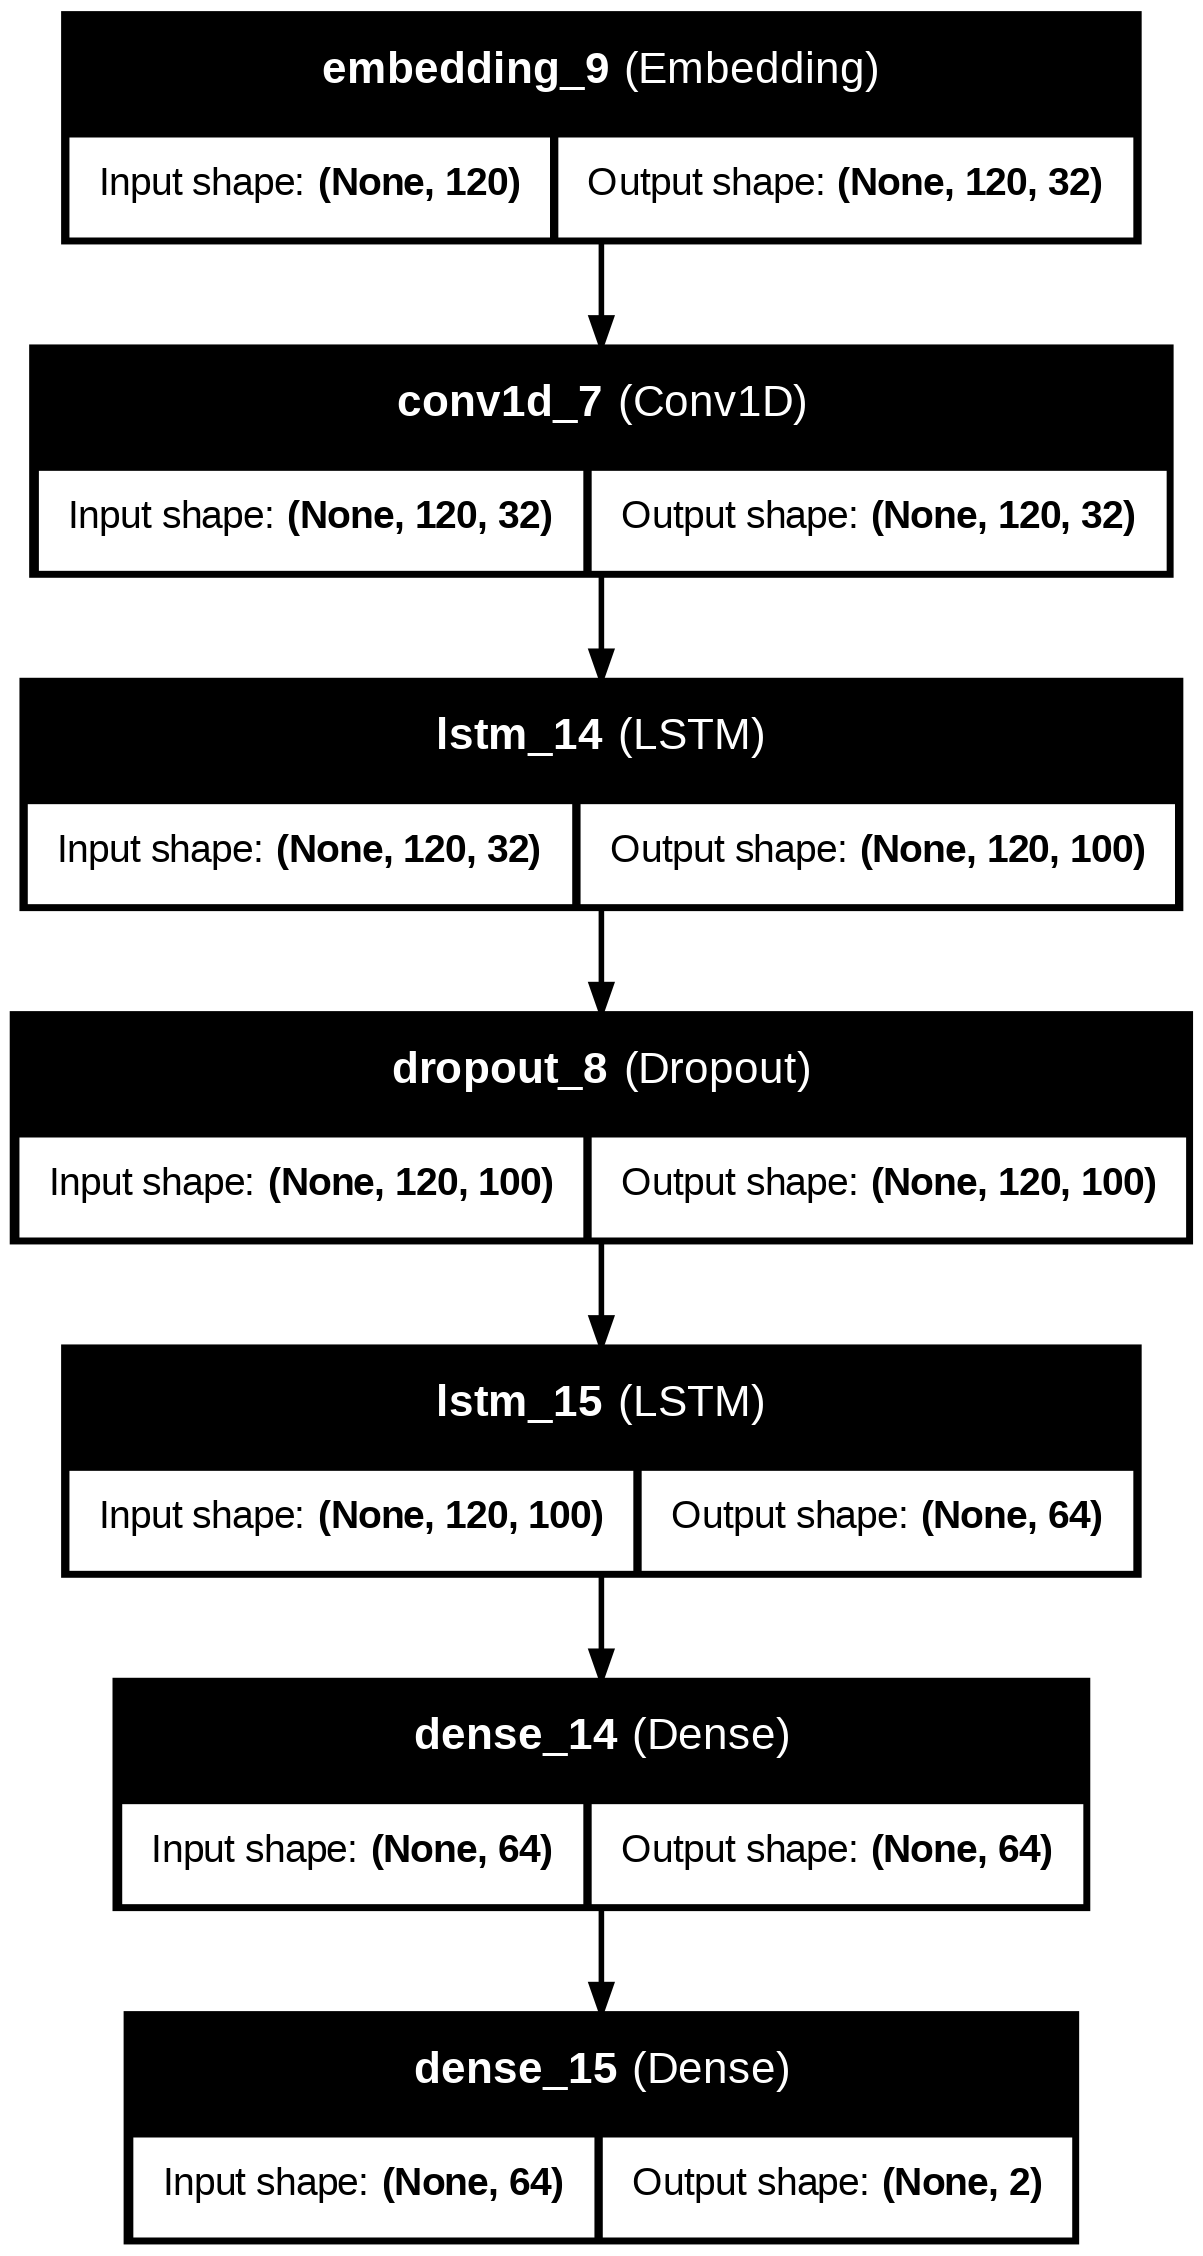

In [ ]:
from tensorflow.keras.utils import plot_model  # Import plot_model function

plot_model(model, to_file='model_bilstm.png', show_shapes=True, show_layer_names=True)


272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Precision: 0.8337363495177081
Recall: 0.8295912492803684
F1 Score: 0.8304622707558681


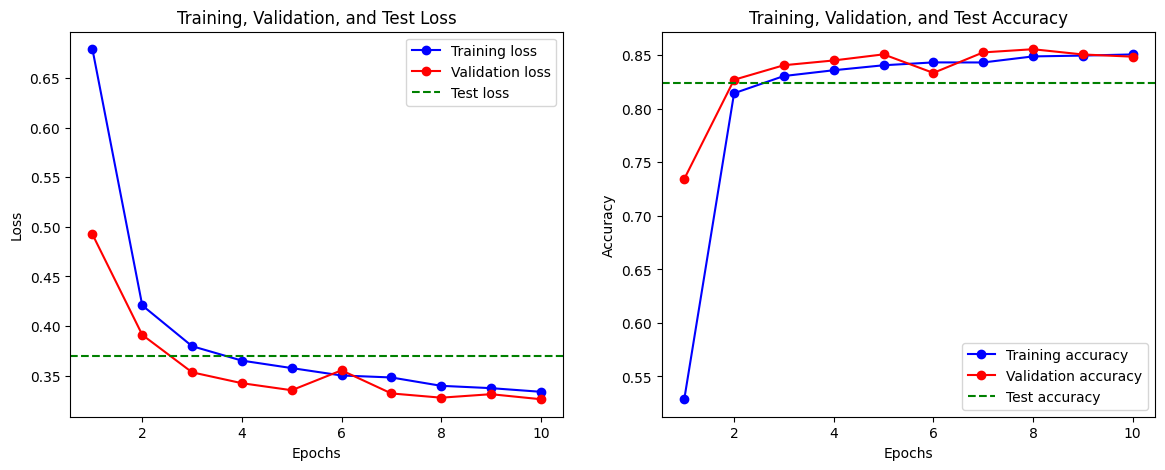

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict on the test set
y_pred = model.predict(XX_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate precision, recall, and F1 score
precision = precision_score(yy_test, y_pred_classes, average='weighted')
recall = recall_score(yy_test, y_pred_classes, average='weighted')
f1 = f1_score(yy_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting training, validation, and test metrics
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Extract the loss and accuracy from the history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Test loss')  # Test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Test accuracy')  # Test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Step 6: Build BiLSTM model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=32, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False))
#model.add(Dropout(0.3))  # Dropout in dense layers

model.add(Bidirectional(LSTM(64)))
#model.add(Dropout(0.2))  # Dropout in dense layers

model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))  # Dropout in dense layers

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Step 7: Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Step 8: Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(XX_test, yy_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7924 - loss: 0.4340 - val_accuracy: 0.8357 - val_loss: 0.3622
Epoch 2/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8348 - loss: 0.3632 - val_accuracy: 0.8417 - val_loss: 0.3424
Epoch 3/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8448 - loss: 0.3459 - val_accuracy: 0.8280 - val_loss: 0.3612
Epoch 4/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8460 - loss: 0.3395 - val_accuracy: 0.8529 - val_loss: 0.3255
Epoch 5/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8486 - loss: 0.3376 - val_accuracy: 0.8448 - val_loss: 0.3367
Epoch 6/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8520 - loss: 0.3268 - val_accuracy: 0.8556 - val_loss: 0.3229
Epoch 7/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8571 - loss: 0.3211 - val_accuracy: 0.8592 - val_loss: 0.3170
Epoch 8/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8568 - loss: 0.31

272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.8377725237104652
Recall: 0.8352331606217617
F1 Score: 0.836186704969612


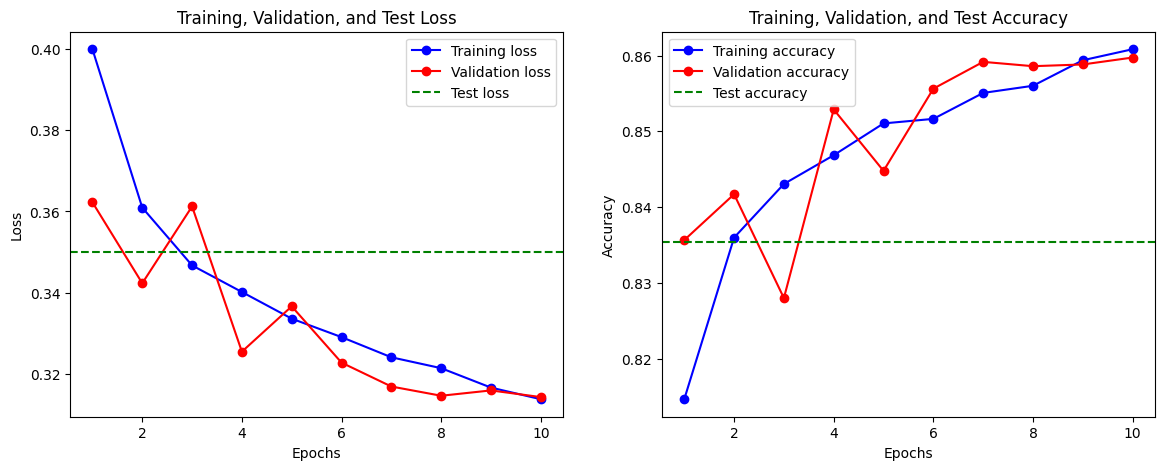

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict on the test set
y_pred = model.predict(XX_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate precision, recall, and F1 score
precision = precision_score(yy_test, y_pred_classes, average='weighted')
recall = recall_score(yy_test, y_pred_classes, average='weighted')
f1 = f1_score(yy_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting training, validation, and test metrics
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Extract the loss and accuracy from the history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Test loss')  # Test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Test accuracy')  # Test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Precision: 0.8411525126222285
Recall: 0.8239493379389753
F1 Score: 0.8277134519014738


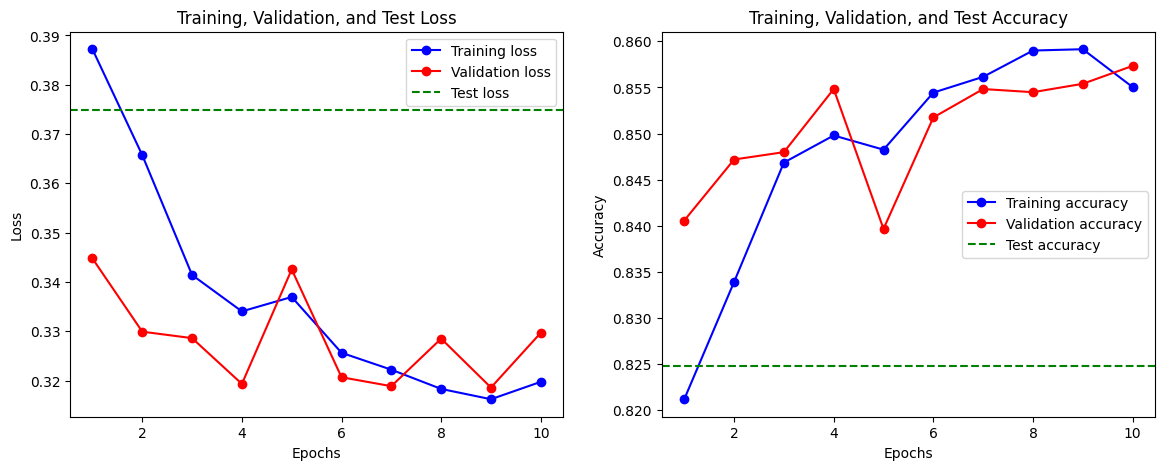

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict on the test set
y_pred = model.predict(XX_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate precision, recall, and F1 score
precision = precision_score(yy_test, y_pred_classes, average='weighted')
recall = recall_score(yy_test, y_pred_classes, average='weighted')
f1 = f1_score(yy_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting training, validation, and test metrics
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Extract the loss and accuracy from the history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Test loss')  # Test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Test accuracy')  # Test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


BI-LSTM

In [ ]:
# Step 6: Build BiLSTM model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=32, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False))
#model.add(Dropout(0.3))  # Dropout in dense layers

model.add(Bidirectional(LSTM(64)))
#model.add(Dropout(0.2))  # Dropout in dense layers

model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))  # Dropout in dense layers

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Step 7: Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Step 8: Train the model
history=model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(XX_test, yy_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8016 - loss: 0.4284 - val_accuracy: 0.8404 - val_loss: 0.3521
Epoch 2/5
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8331 - loss: 0.3642 - val_accuracy: 0.8478 - val_loss: 0.3368
Epoch 3/5
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8399 - loss: 0.3516 - val_accuracy: 0.8497 - val_loss: 0.3311
Epoch 4/5
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8481 - loss: 0.3366 - val_accuracy: 0.8535 - val_loss: 0.3224
Epoch 5/5
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8512 - loss: 0.3289 - val_accuracy: 0.8538 - val_loss: 0.3206
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8375 - loss: 0.3378
Loss: 0.34284111857414246, Accuracy: 0.8379965424537659


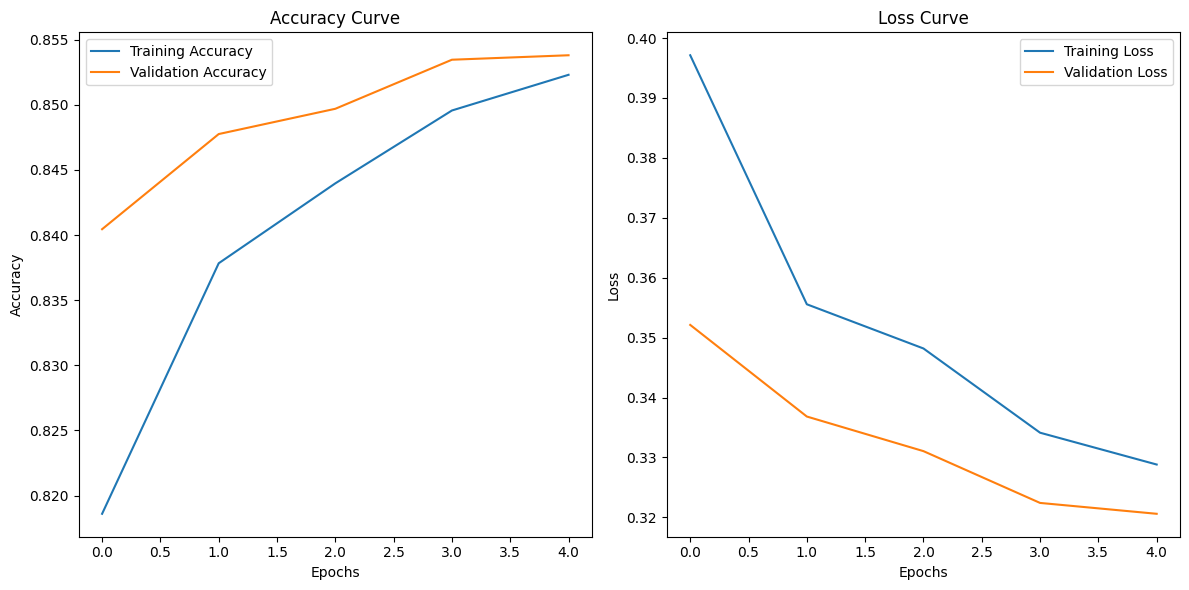

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Precision: 0.8387562348925176
Recall: 0.8385722510074841
F1 Score: 0.8385645147626458


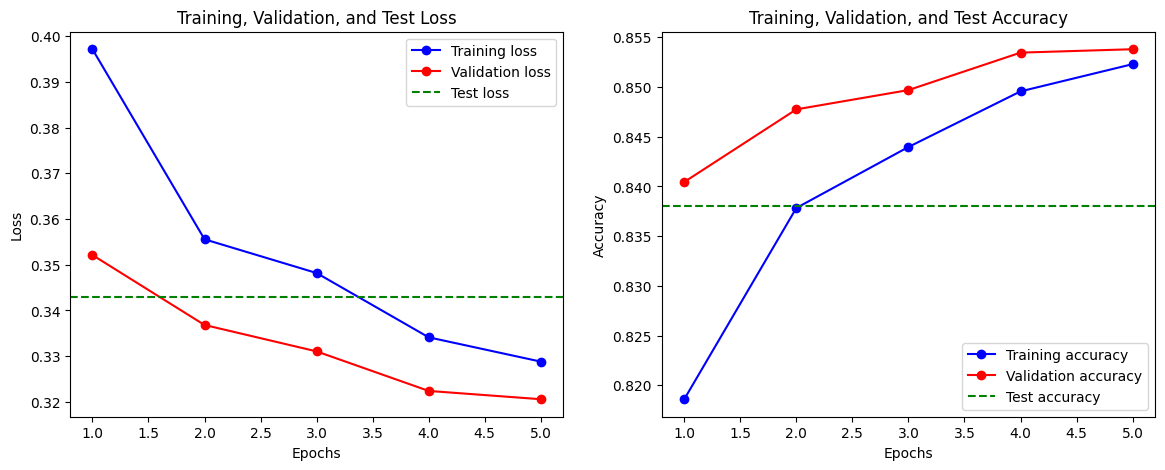

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict on the test set
y_pred = model.predict(XX_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate precision, recall, and F1 score
precision = precision_score(yy_test, y_pred_classes, average='weighted')
recall = recall_score(yy_test, y_pred_classes, average='weighted')
f1 = f1_score(yy_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting training, validation, and test metrics
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Extract the loss and accuracy from the history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Test loss')  # Test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Test accuracy')  # Test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report
# Step 10: Predict and calculate precision, recall, F1 score
y_pred = model.predict(XX_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels
y_true_classes = np.argmax(yy_test, axis=1)  # Convert one-hot ground truth to class labels

# Generate a classification report
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Accuracy: 0.7439

Classification Report:

              precision    recall  f1-score   support

           0     0.8886    0.6999    0.7831      5575
           1     0.5869    0.8294    0.6874      2866

    accuracy                         0.7439      8441
   macro avg     0.7378    0.7646    0.7352      8441
weighted avg     0.7862    0.7439    0.7506      8441



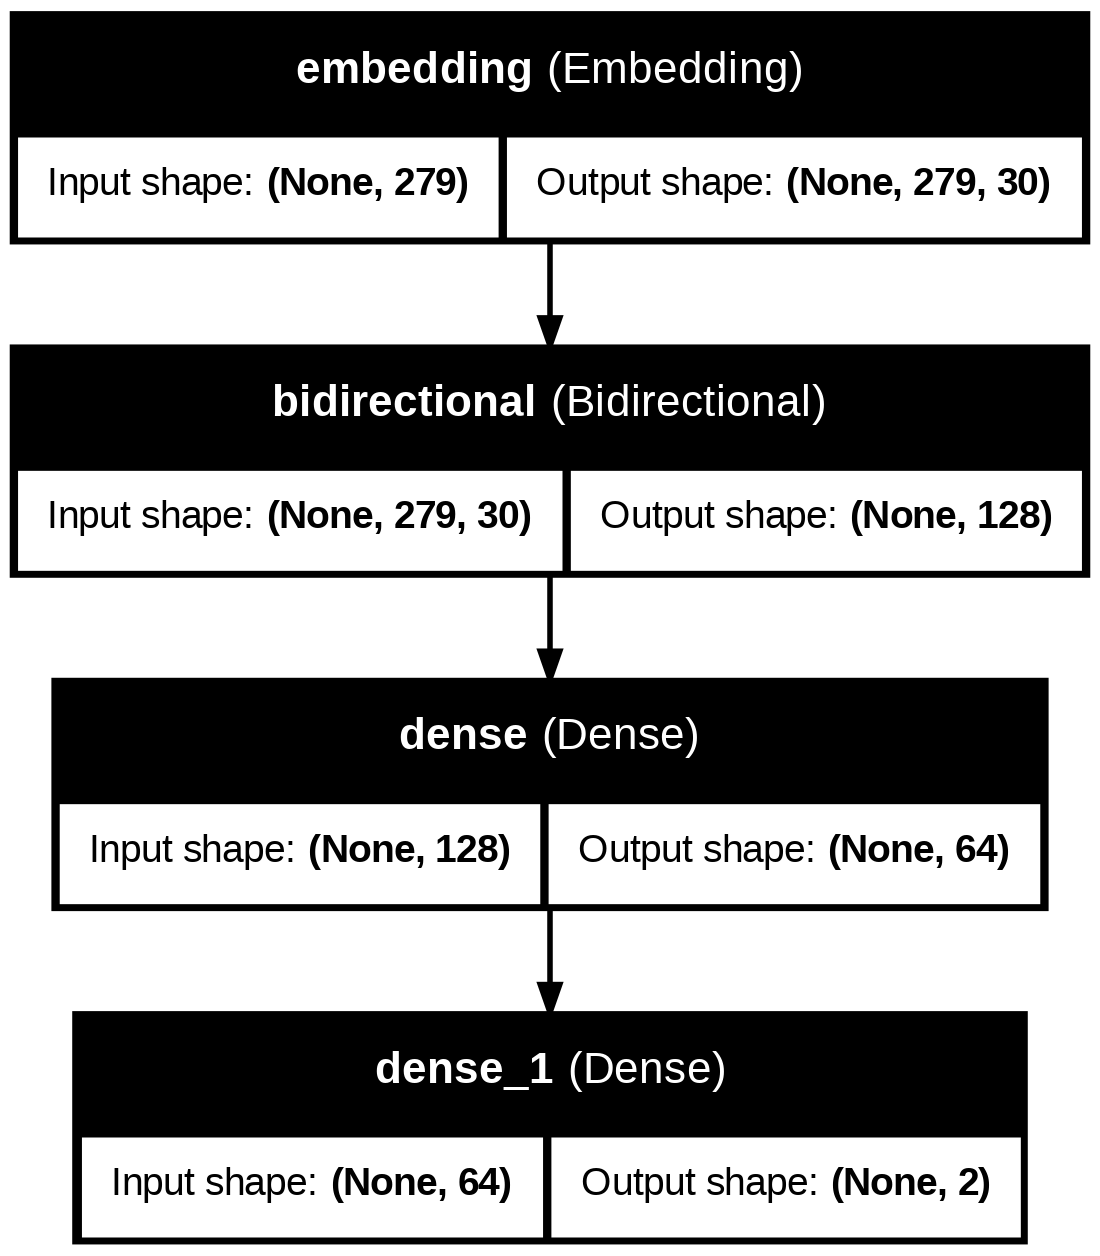

In [ ]:
from tensorflow.keras.utils import plot_model  # Import plot_model function

plot_model(model, to_file='model_bilstm.png', show_shapes=True, show_layer_names=True)


CNN-LSTM

CNN-GRU Model

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling1D, GRU
from tensorflow.keras.optimizers import Adam

# Define optimizer
optimizer = Adam(learning_rate=0.001)

# Step 6: Build CNN-GRU model
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim=32,
                    weights=[embedding_matrix],
                    input_length=X_train.shape[1],
                    trainable=False))  # Pre-trained embedding
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))  # Adjusted kernel size and filters
model.add(GRU(64, return_sequences=True))  # GRU with 100 units
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer

# Step 7: Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))  # Increased epochs and decreased batch size

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(XX_test, yy_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7741 - loss: 0.4747 - val_accuracy: 0.8173 - val_loss: 0.3985
Epoch 2/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8306 - loss: 0.3776 - val_accuracy: 0.8432 - val_loss: 0.3483
Epoch 3/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8353 - loss: 0.3613 - val_accuracy: 0.8514 - val_loss: 0.3346
Epoch 4/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8422 - loss: 0.3465 - val_accuracy: 0.8532 - val_loss: 0.3341
Epoch 5/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8500 - loss: 0.3377 - val_accuracy: 0.8486 - val_loss: 0.3354
Epoch 6/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8495 - loss: 0.3381 - val_accuracy: 0.8549 - val_loss: 0.3286
Epoch 7/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8490 - loss: 0.3350 - val_accuracy: 0.8539 - val_loss: 0.3312
Epoch 8/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8553 - loss: 0.3255 - val_

In [ ]:
from sklearn.metrics import classification_report
# Step 10: Predict and calculate precision, recall, F1 score
y_pred = model.predict(XX_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels
y_true_classes = np.argmax(yy_test, axis=1)  # Convert one-hot ground truth to class labels
print(f"Accuracy: {accuracy:.4f}")
# Generate a classification report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.8241

Classification Report:

              precision    recall  f1-score   support

           0     0.8791    0.8478    0.8632      5685
           1     0.7299    0.7790    0.7536      3000

    accuracy                         0.8241      8685
   macro avg     0.8045    0.8134    0.8084      8685
weighted avg     0.8275    0.8241    0.8253      8685



272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.8347844302409273
Recall: 0.8315486470926885
F1 Score: 0.8326854182824229


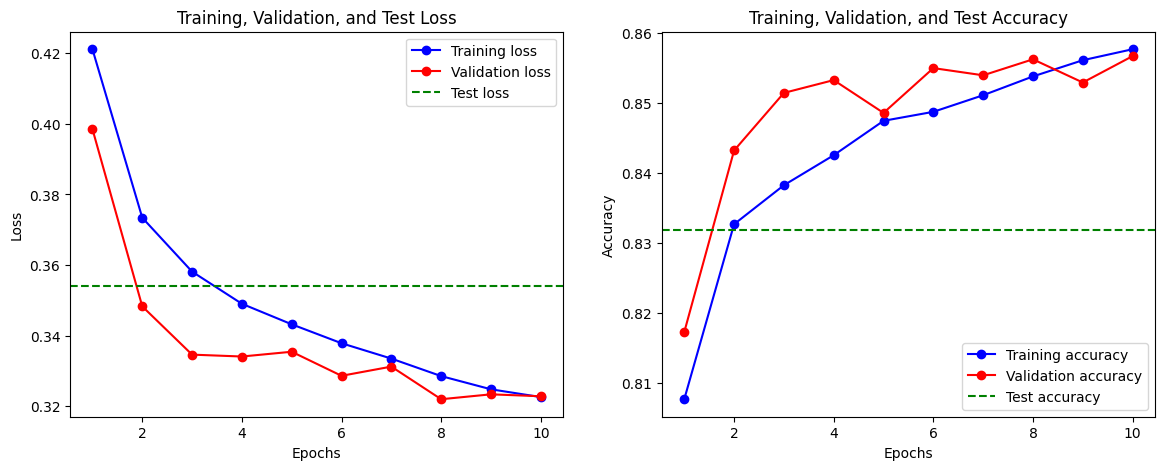

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict on the test set
y_pred = model.predict(XX_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate precision, recall, and F1 score
precision = precision_score(yy_test, y_pred_classes, average='weighted')
recall = recall_score(yy_test, y_pred_classes, average='weighted')
f1 = f1_score(yy_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting training, validation, and test metrics
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Extract the loss and accuracy from the history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Test loss')  # Test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Test accuracy')  # Test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

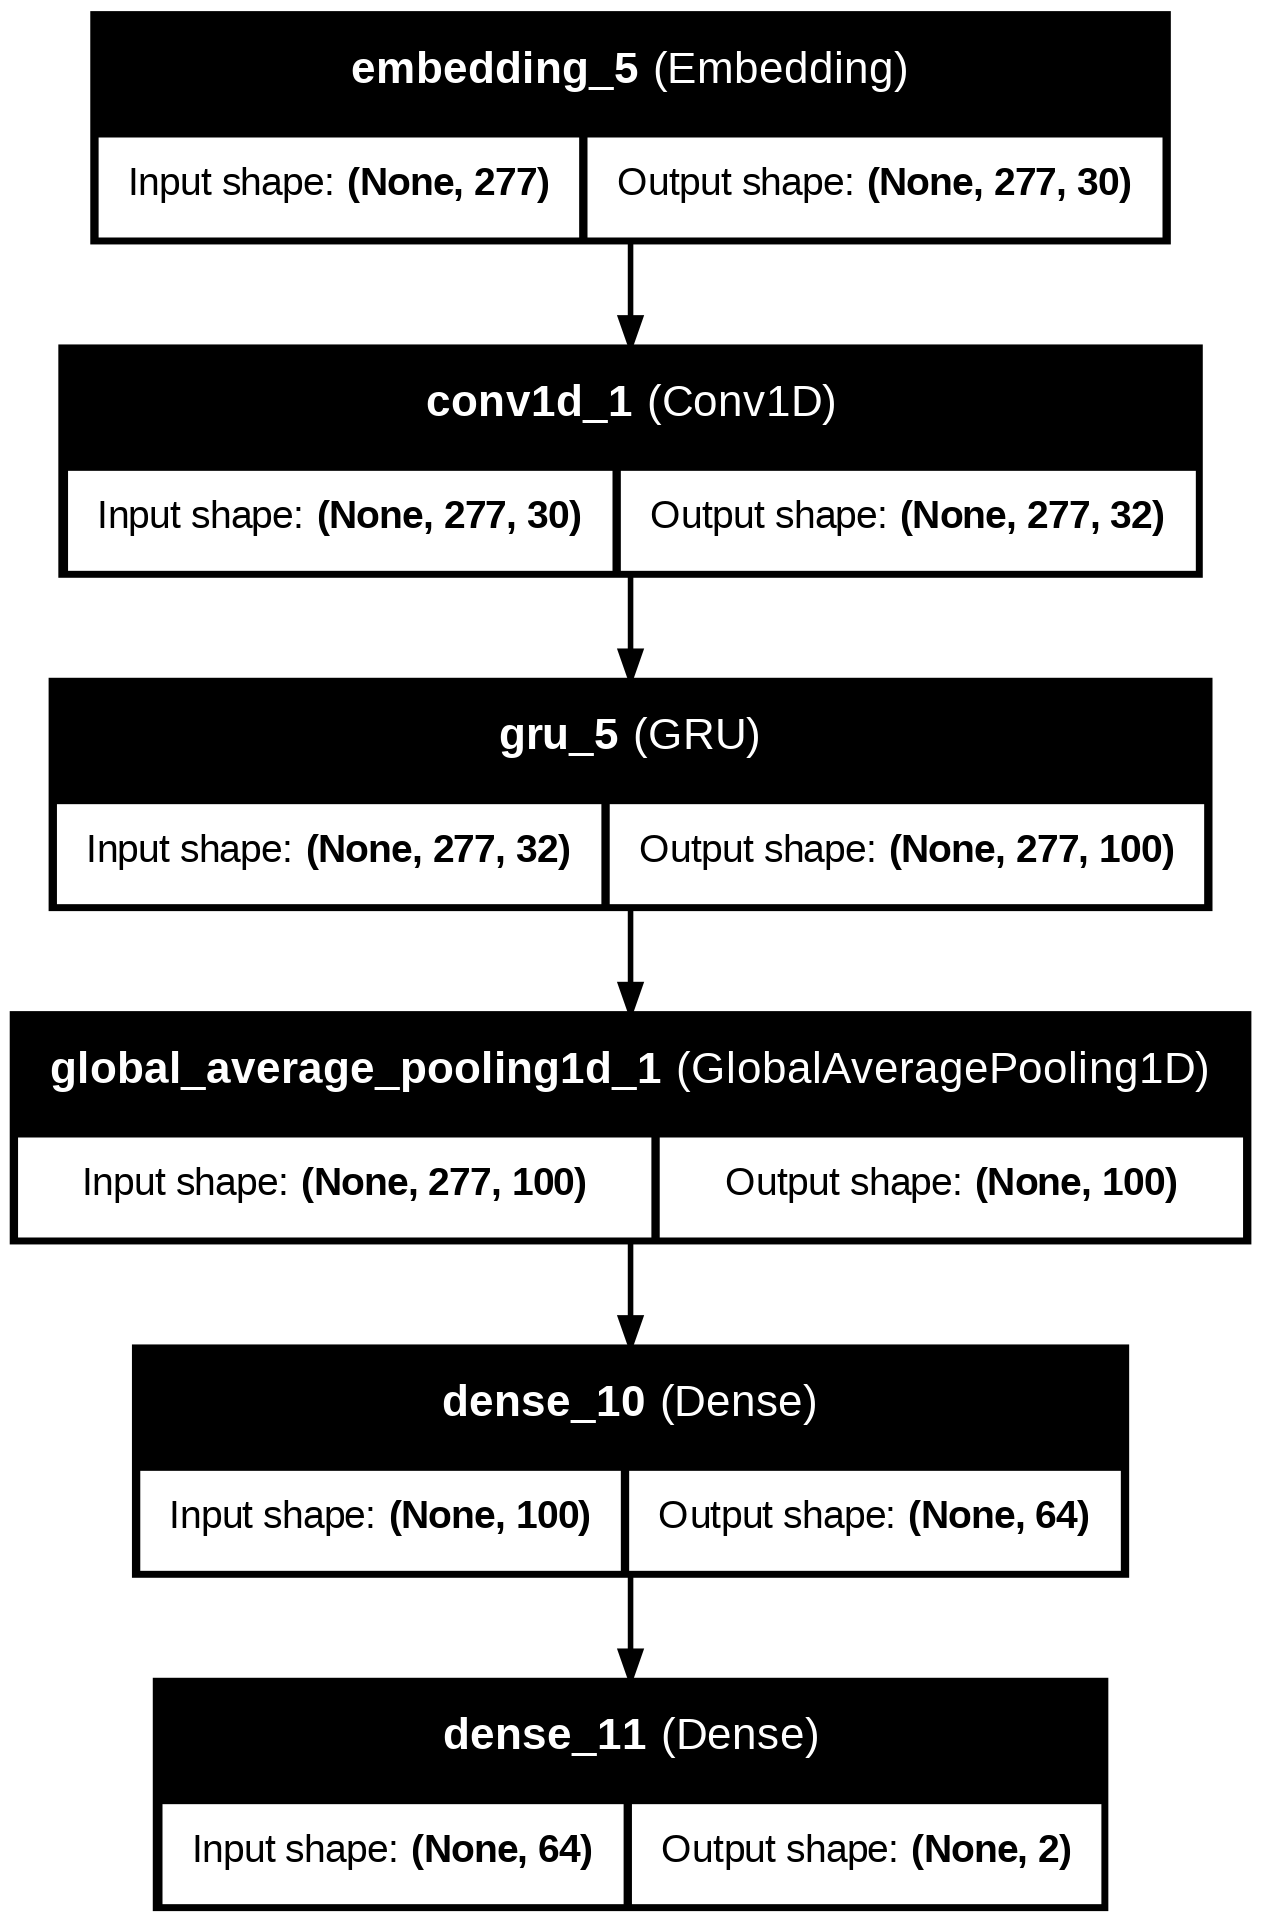

In [ ]:
from tensorflow.keras.utils import plot_model  # Import plot_model function

plot_model(model, to_file='model_cnn_fft.png', show_shapes=True, show_layer_names=True)

LSTM+GRU


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

# Define optimizer
optimizer = Adam(learning_rate=0.001)

# Initialize the model
model = Sequential()

# Step 1: Add Embedding Layer
# Assuming embedding_matrix is pre-trained and X_train contains tokenized input
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim=32,
                    weights=[embedding_matrix],
                    input_length=X_train.shape[1],
                    trainable=False))

# Step 2: Add a Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Output sequence required for next GRU layer

# Step 3: Add a GRU Layer
model.add(GRU(32))  # A GRU layer after LSTM

# Step 4: Dense Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Step 5: Output Layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Step 6: Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(XX_test, yy_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5566 - loss: 0.6639 - val_accuracy: 0.5843 - val_loss: 0.6325
Epoch 2/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.5763 - loss: 0.6399 - val_accuracy: 0.5086 - val_loss: 0.6915
Epoch 3/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.5075 - loss: 0.6919 - val_accuracy: 0.5086 - val_loss: 0.6902
Epoch 4/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5720 - loss: 0.6341 - val_accuracy: 0.8298 - val_loss: 0.3676
Epoch 5/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8321 - loss: 0.3687 - val_accuracy: 0.8448 - val_loss: 0.3359
Epoch 6/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8434 - loss: 0.3491 - val_accuracy: 0.8468 - val_loss: 0.3393
Epoch 7/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8510 - loss: 0.3381 - val_accuracy: 0.8491 - val_loss: 0.3253
Epoch 8/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8485 -

272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.8418734988068669
Recall: 0.8301669545192861
F1 Score: 0.8329035500481138


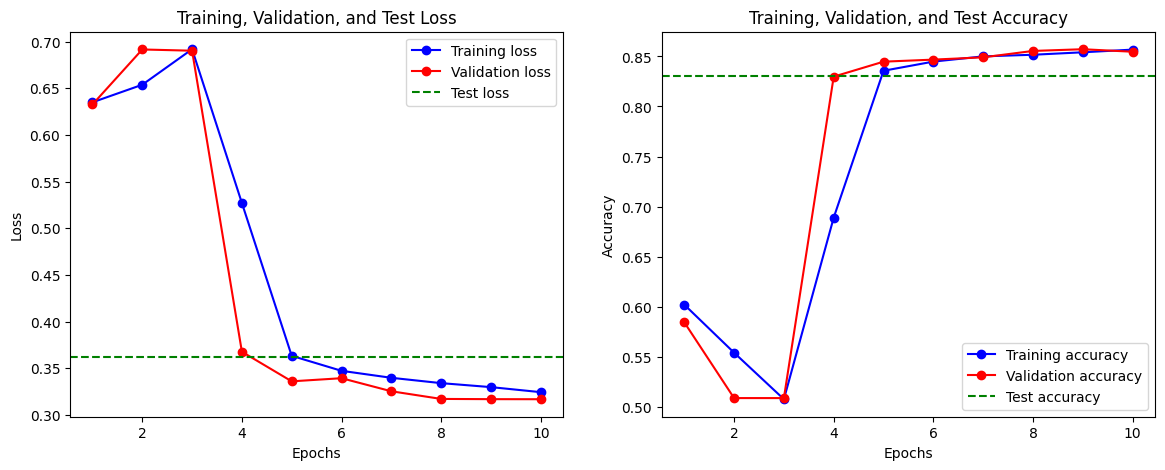

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict on the test set
y_pred = model.predict(XX_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate precision, recall, and F1 score
precision = precision_score(yy_test, y_pred_classes, average='weighted')
recall = recall_score(yy_test, y_pred_classes, average='weighted')
f1 = f1_score(yy_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting training, validation, and test metrics
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Extract the loss and accuracy from the history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Test loss')  # Test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Test accuracy')  # Test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Step 10: Predict and calculate precision, recall, F1 score
y_pred = model.predict(XX_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels
y_true_classes = np.argmax(yy_test, axis=1)  # Convert one-hot ground truth to class labels
print(f"Accuracy: {accuracy:.4f}")
# Generate a classification report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.8302

Classification Report:

              precision    recall  f1-score   support

           0     0.9083    0.8237    0.8639      5685
           1     0.7161    0.8423    0.7741      3000

    accuracy                         0.8302      8685
   macro avg     0.8122    0.8330    0.8190      8685
weighted avg     0.8419    0.8302    0.8329      8685



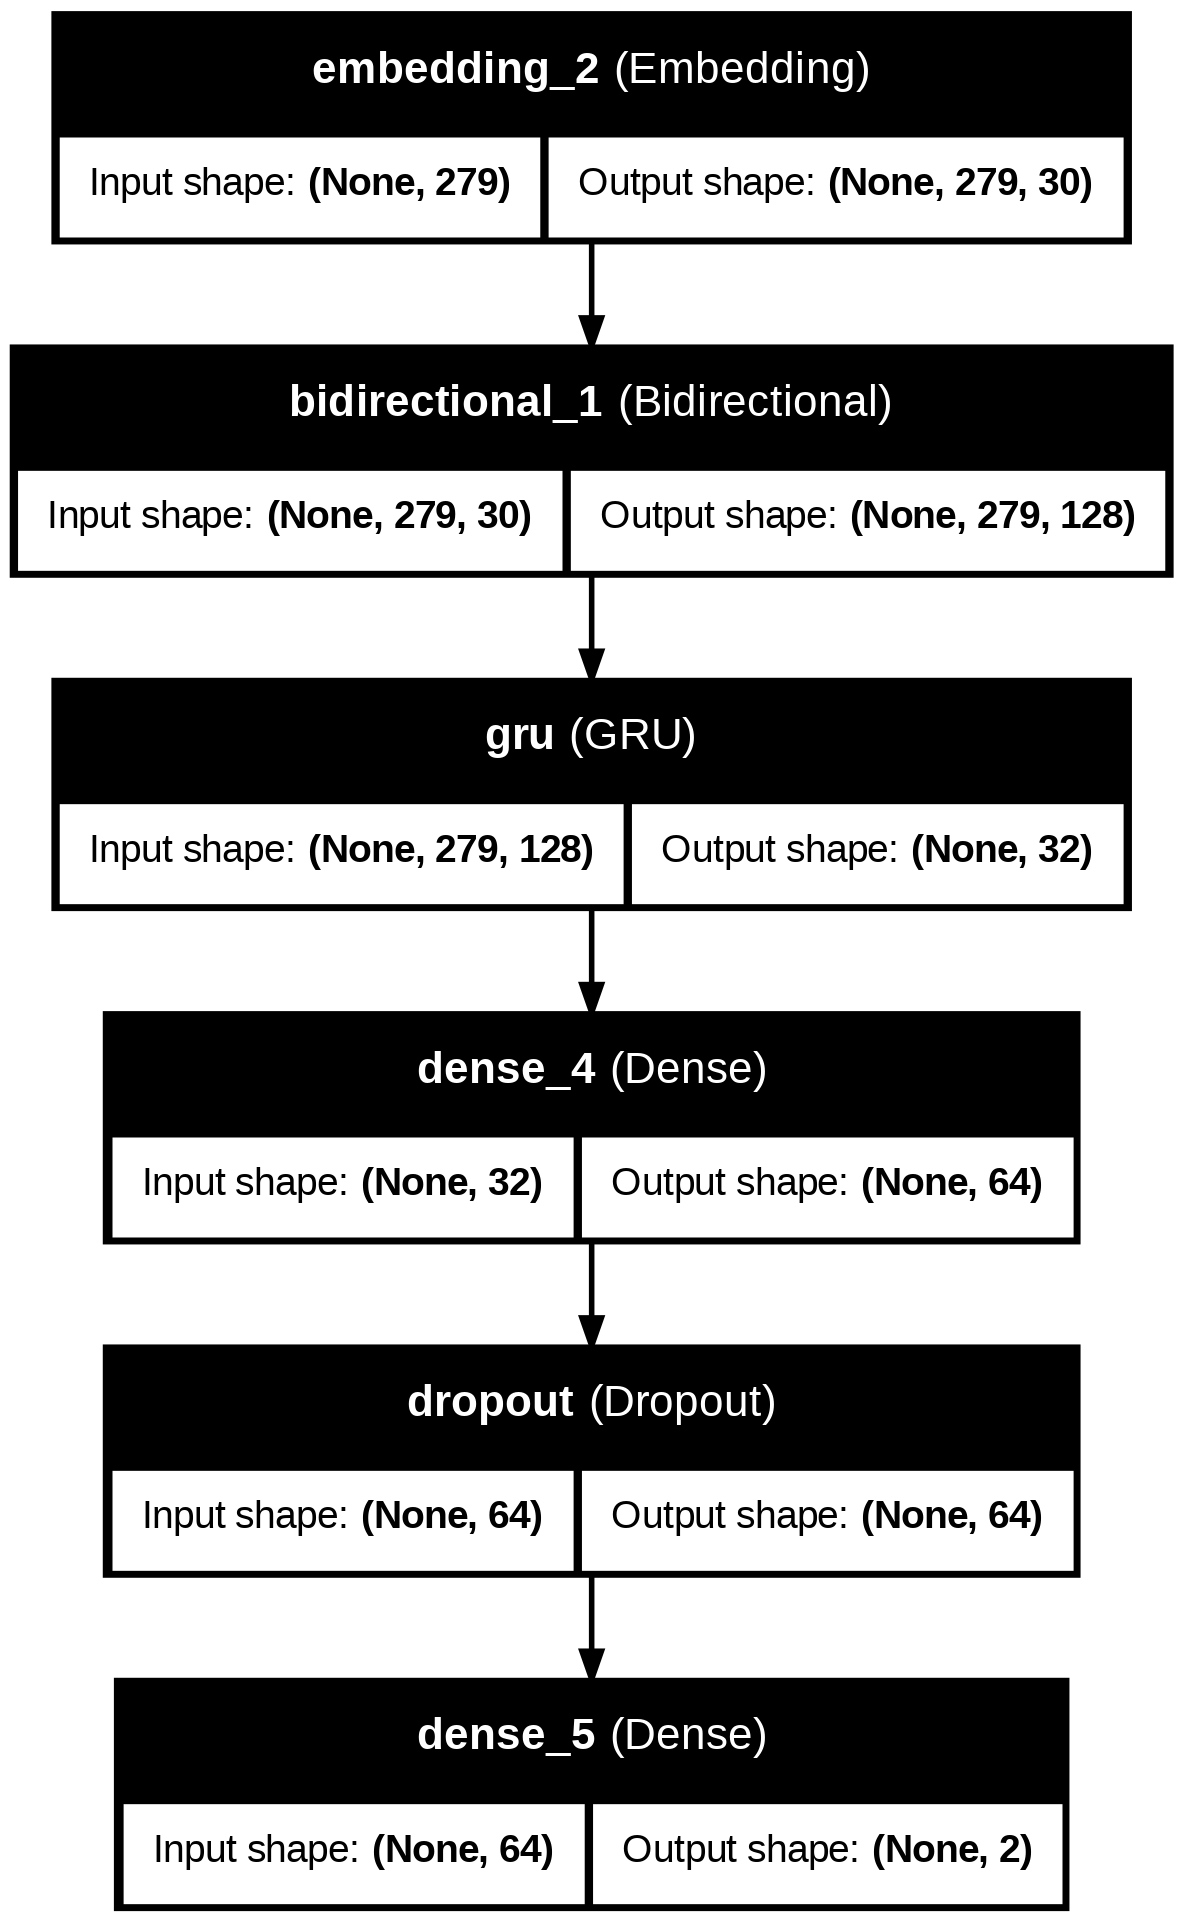

In [ ]:
from tensorflow.keras.utils import plot_model  # Import plot_model function

plot_model(model, to_file='model_cnn_lstm.png', show_shapes=True, show_layer_names=True)

GRU-LSTM

In [ ]:
# GRU-LSTM Model
from tensorflow.keras.layers import GRU, LSTM

# Build the GRU-LSTM model
model_gru_lstm = Sequential()
model_gru_lstm.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=32, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model_gru_lstm.add(GRU(64, return_sequences=True))  # GRU layer first
model_gru_lstm.add(LSTM(64))  # LSTM layer follows
model_gru_lstm.add(Dense(64, activation='relu'))
model_gru_lstm.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model_gru_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model_gru_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss_gru_lstm, accuracy_gru_lstm = model_gru_lstm.evaluate(XX_test, yy_test)
print(f'Loss (GRU-LSTM): {loss_gru_lstm}, Accuracy (GRU-LSTM): {accuracy_gru_lstm}')


Epoch 1/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5085 - loss: 0.6929 - val_accuracy: 0.7607 - val_loss: 0.4971
Epoch 2/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.7981 - loss: 0.4400 - val_accuracy: 0.8399 - val_loss: 0.3654
Epoch 3/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8328 - loss: 0.3781 - val_accuracy: 0.8406 - val_loss: 0.3555
Epoch 4/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8374 - loss: 0.3576 - val_accuracy: 0.8545 - val_loss: 0.3282
Epoch 5/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8449 - loss: 0.3499 - val_accuracy: 0.8549 - val_loss: 0.3241
Epoch 6/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8498 - loss: 0.3379 - val_accuracy: 0.8543 - val_loss: 0.3292
Epoch 7/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8491 - loss: 0.3402 - val_accuracy: 0.8535 - val_loss: 0.3269
Epoch 8/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8510 -

272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.8418734988068669
Recall: 0.8301669545192861
F1 Score: 0.8329035500481138


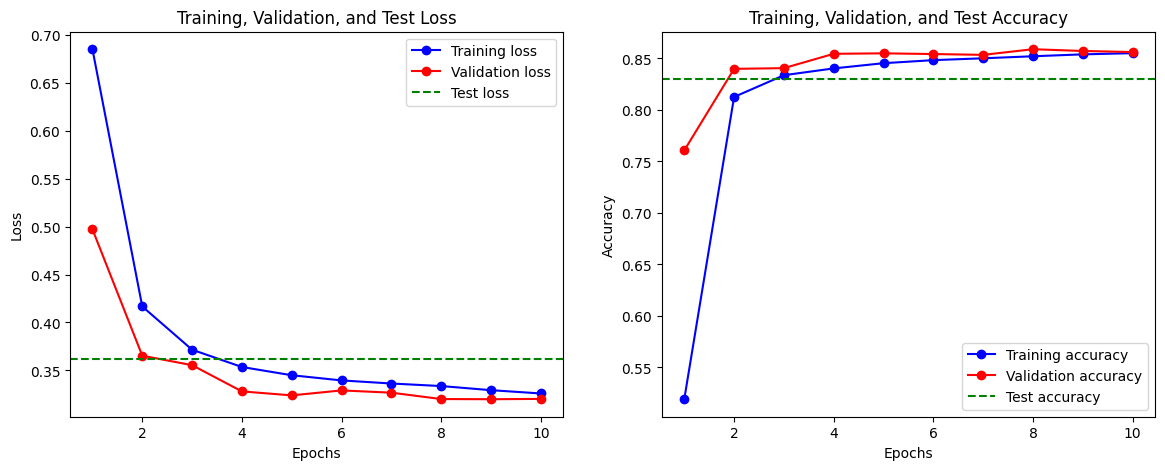

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict on the test set
y_pred = model.predict(XX_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Calculate precision, recall, and F1 score
precision = precision_score(yy_test, y_pred_classes, average='weighted')
recall = recall_score(yy_test, y_pred_classes, average='weighted')
f1 = f1_score(yy_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting training, validation, and test metrics
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Extract the loss and accuracy from the history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=loss, color='g', linestyle='--', label='Test loss')  # Test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=accuracy, color='g', linestyle='--', label='Test accuracy')  # Test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

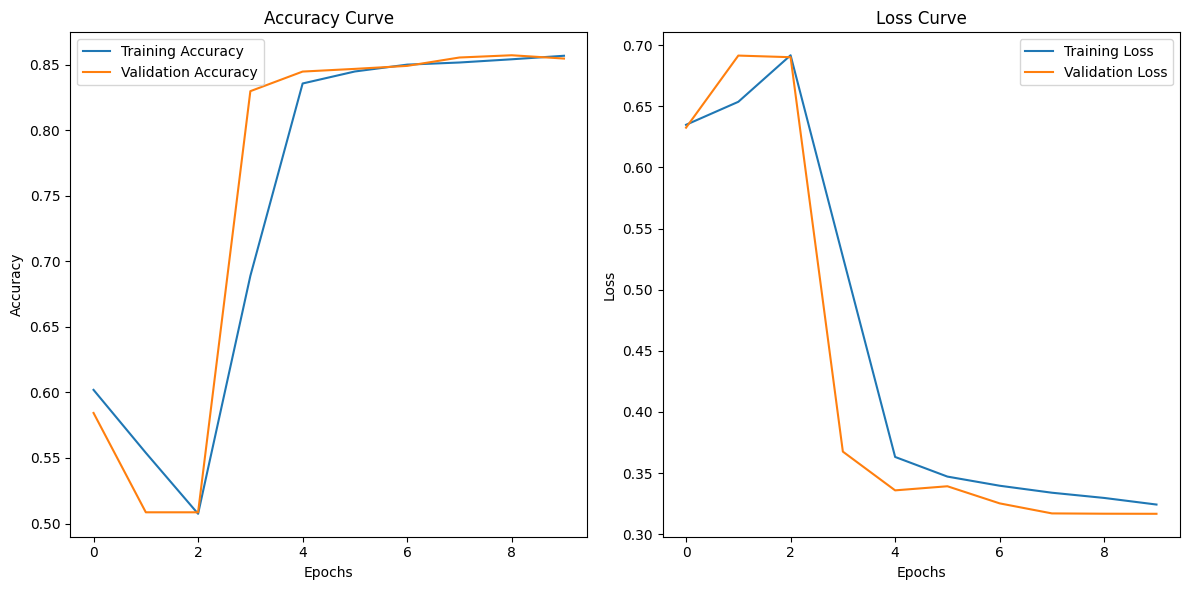

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Step 10: Predict and calculate precision, recall, F1 score
loss, accuracy = model_gru_lstm.evaluate(XX_test, yy_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
y_pred = model_gru_lstm.predict(XX_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels
y_true_classes = np.argmax(yy_test, axis=1)  # Convert one-hot ground truth to class labels
print(f"Accuracy: {accuracy:.4f}")
# Generate a classification report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7189 - loss: 0.5589
Loss: 0.5588698387145996, Accuracy: 0.7124748229980469
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.7125

Classification Report:

              precision    recall  f1-score   support

           0     0.9195    0.6188    0.7398      5575
           1     0.5468    0.8946    0.6788      2866

    accuracy                         0.7125      8441
   macro avg     0.7332    0.7567    0.7093      8441
weighted avg     0.7930    0.7125    0.7191      8441



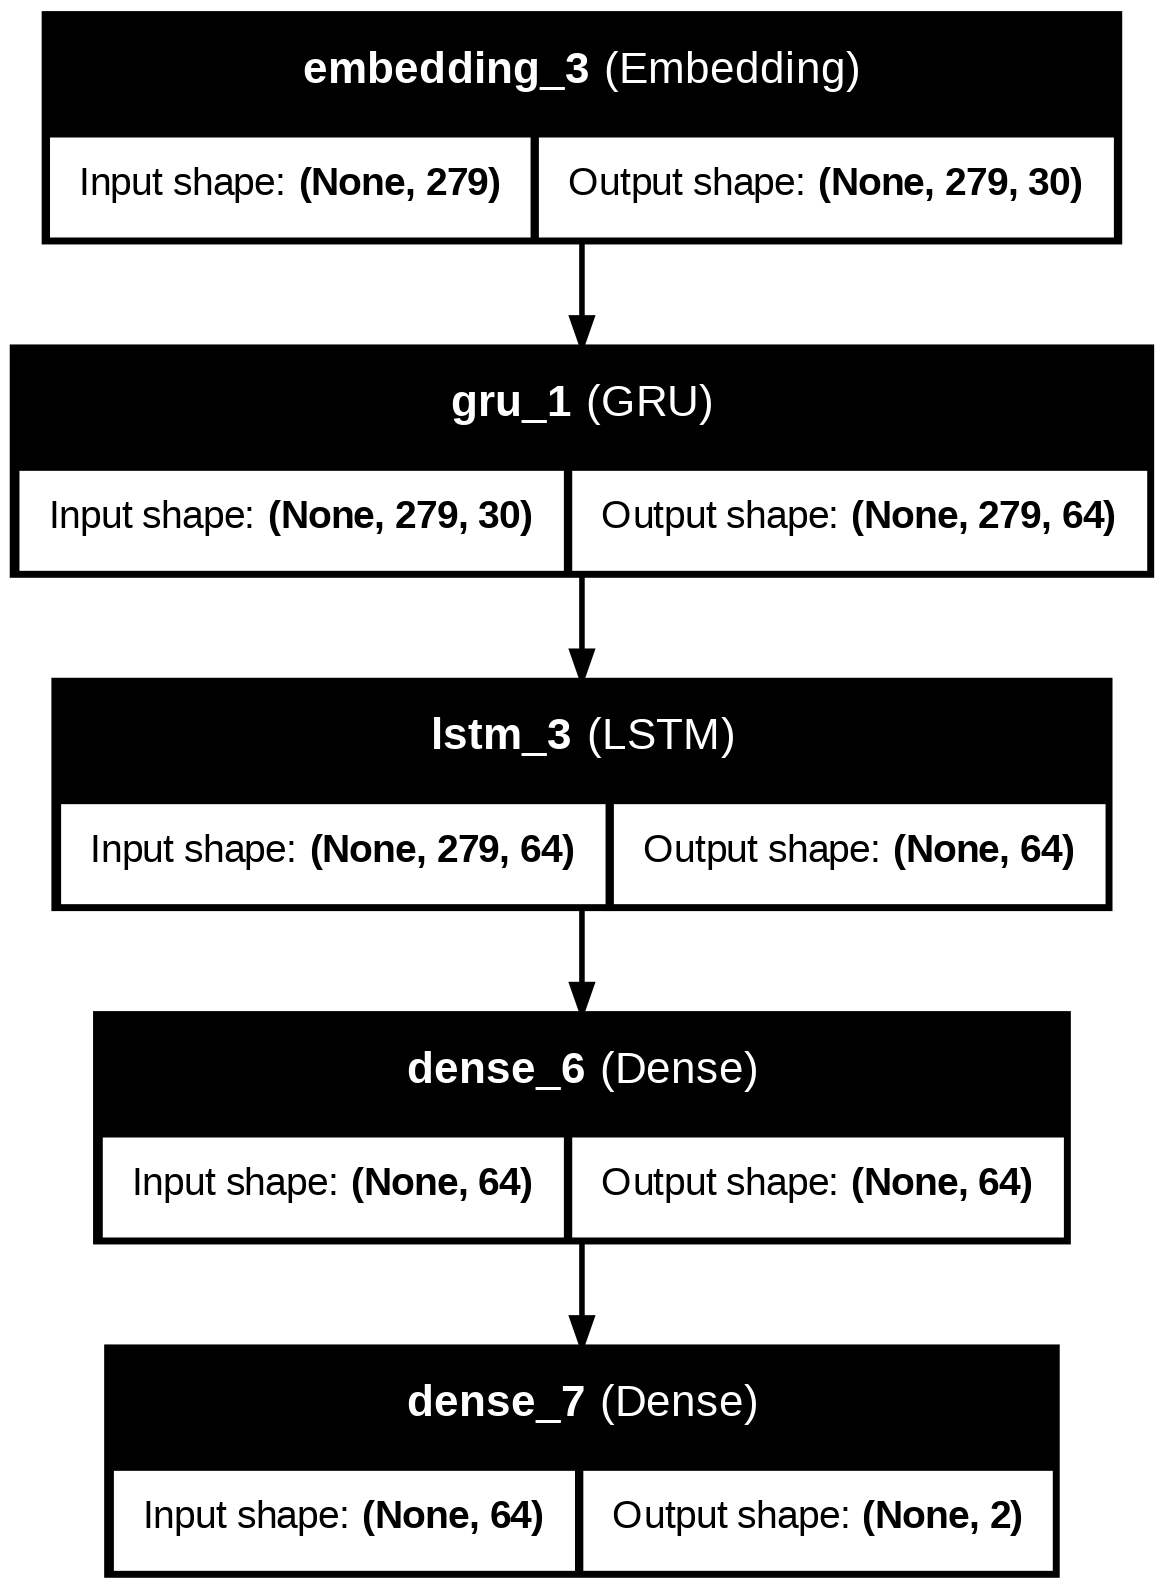

In [ ]:
from tensorflow.keras.utils import plot_model  # Import plot_model function

plot_model(model_gru_lstm, to_file='model_gru_lstm.png', show_shapes=True, show_layer_names=True)

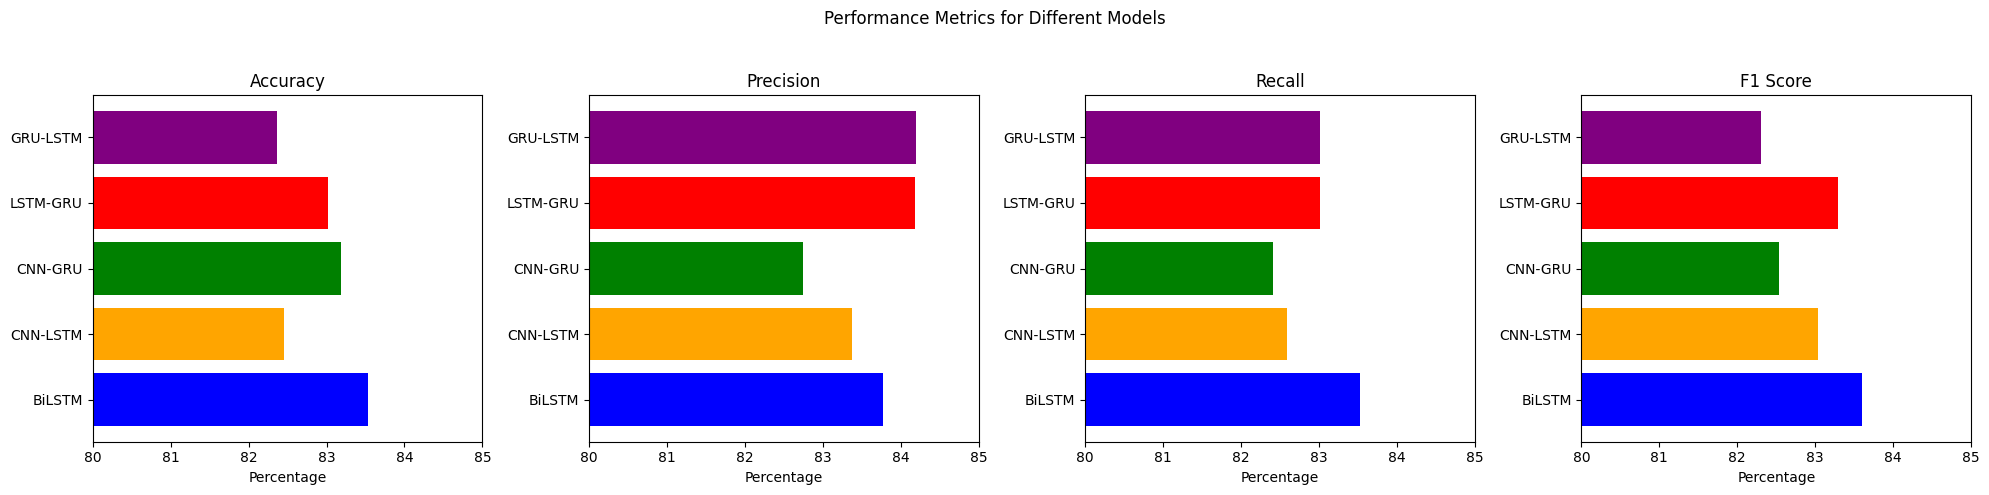

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['BiLSTM', 'CNN-LSTM', 'CNN-GRU', 'LSTM-GRU', 'GRU-LSTM']
accuracy = [83.53, 82.46, 83.18, 83.0166, 82.36]
precision = [83.77, 83.38, 82.75, 84.18, 84.2]
recall = [83.52, 82.59, 82.41, 83.01, 83.016]
f1_score = [83.6, 83.04, 82.53, 83.29, 82.3]

# Set up the plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Performance Metrics for Different Models')

# Plot each metric
for i, ax in enumerate(axes):
    ax.barh(models, values[i], color=['blue', 'orange', 'green', 'red', 'purple'])
    ax.set_title(metrics[i])
    ax.set_xlim(80, 85)
    ax.set_xlabel('Percentage')
    ax.set_yticks(models)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


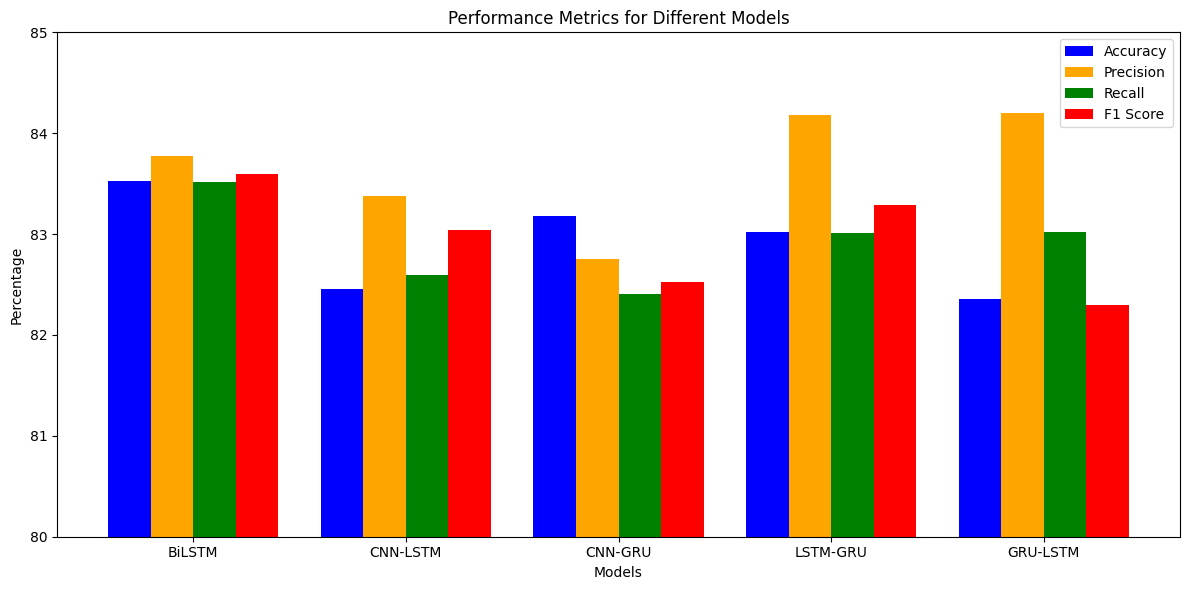

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['BiLSTM', 'CNN-LSTM', 'CNN-GRU', 'LSTM-GRU', 'GRU-LSTM']
accuracy = [83.53, 82.46, 83.18, 83.0166, 82.36]
precision = [83.77, 83.38, 82.75, 84.18, 84.2]
recall = [83.52, 82.59, 82.41, 83.01, 83.016]
f1_score = [83.6, 83.04, 82.53, 83.29, 82.3]

# Set up the plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric
ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='blue')
ax.bar(x - 0.5 * width, precision, width, label='Precision', color='orange')
ax.bar(x + 0.5 * width, recall, width, label='Recall', color='green')
ax.bar(x + 1.5 * width, f1_score, width, label='F1 Score', color='red')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(80, 85)
ax.set_ylabel('Percentage')
ax.legend()

fig.tight_layout()
plt.show()


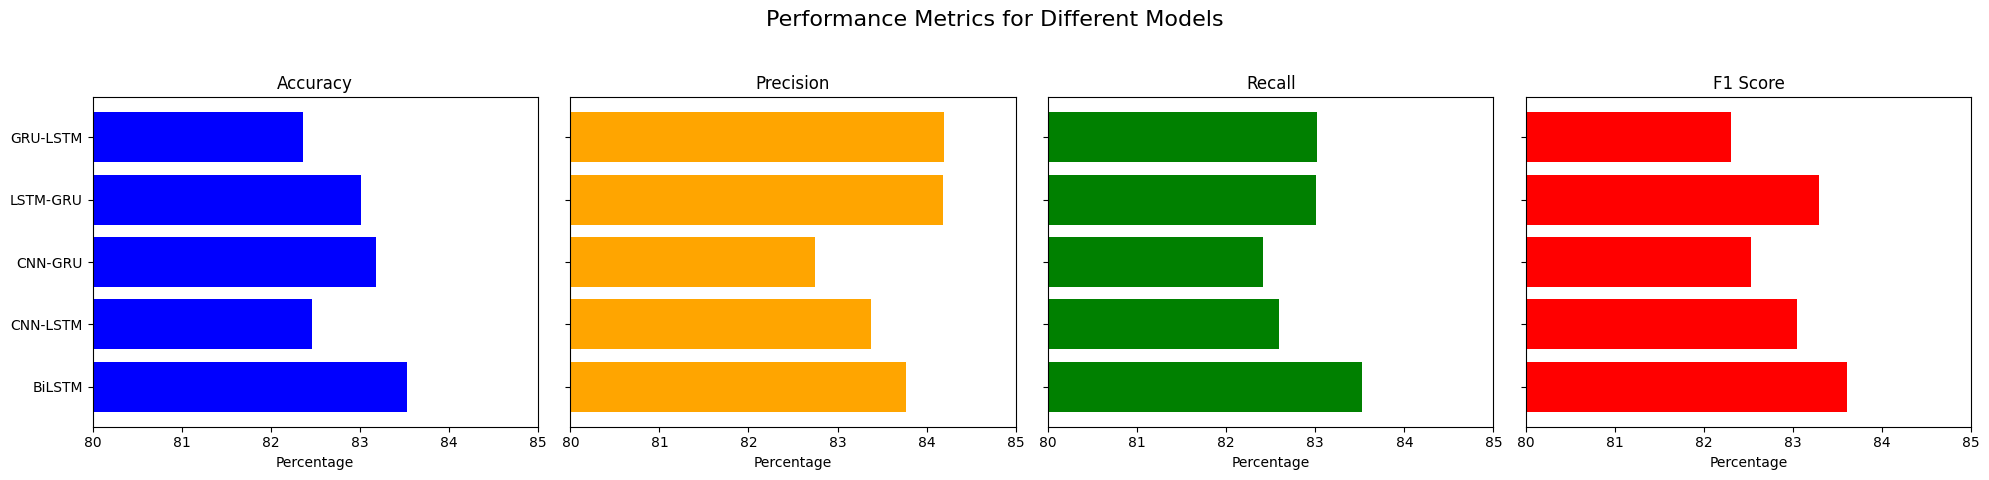

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['BiLSTM', 'CNN-LSTM', 'CNN-GRU', 'LSTM-GRU', 'GRU-LSTM']
accuracy = [83.53, 82.46, 83.18, 83.0166, 82.36]
precision = [83.77, 83.38, 82.75, 84.18, 84.2]
recall = [83.52, 82.59, 82.41, 83.01, 83.016]
f1_score = [83.6, 83.04, 82.53, 83.29, 82.3]

# Set up the plot
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plotting each metric
axs[0].barh(models, accuracy, color='blue')
axs[0].set_title('Accuracy')
axs[0].set_xlim(80, 85)
axs[0].set_xlabel('Percentage')

axs[1].barh(models, precision, color='orange')
axs[1].set_title('Precision')
axs[1].set_xlim(80, 85)
axs[1].set_xlabel('Percentage')

axs[2].barh(models, recall, color='green')
axs[2].set_title('Recall')
axs[2].set_xlim(80, 85)
axs[2].set_xlabel('Percentage')

axs[3].barh(models, f1_score, color='red')
axs[3].set_title('F1 Score')
axs[3].set_xlim(80, 85)
axs[3].set_xlabel('Percentage')

# Add a common title
fig.suptitle('Performance Metrics for Different Models', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
